# Tweeter Sentiments Analyses


## 1- Install Dependancies


In [1]:
# install the required packages
%pip install -r requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.14 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.2.2 which is incompatible.
langchain-community 0.3.14 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.2.2 which is incompatible.
scikit-learn 1.4.1.post1 requires numpy<2.0,>=1.19.5, but you have numpy 2.2.2 which is incompatible.


## 2- Load Dataset


In [1]:
import os

DATA_DIR = "./data/"
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

DATASETS_DIR = os.listdir(DATA_DIR)
print(DATASETS_DIR)

RESULTS_DIR = "./results/"
if not os.path.exists(RESULTS_DIR):
    os.makedirs(RESULTS_DIR)

['cleaned_tweets.csv', 'models_evaluations_results.csv', 'sentiment140.csv', 'stemmed_tweet_results.csv']


In [21]:
import pandas as pd

dataset = "sentiment140.csv"
# Load the dataset
df = pd.read_csv(
    os.path.join(DATA_DIR, dataset), encoding="latin-1", sep=",", header=None
)

#  we noticed that the columns names are messing we will fix them using the data discreption
df.columns = ["target", "ids", "date", "flag", "user", "text"]

df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## 3- Explotary Data Analyses


In [4]:
#  check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


Columns with missing values: []


<Axes: title={'center': 'Missing values count'}>

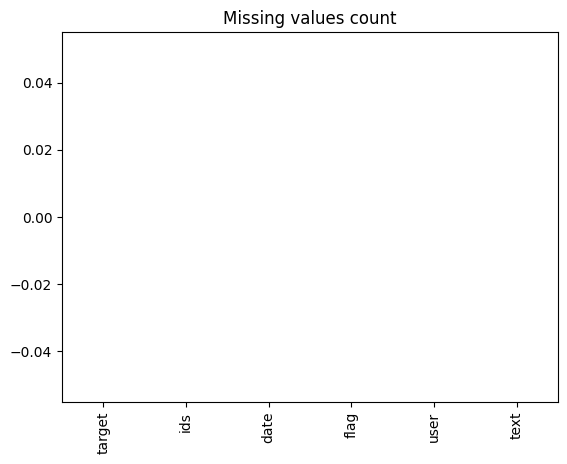

In [5]:
# moving forward will will analyse messsing data
null_count = df.isnull().sum()
na_columns = list(null_count[null_count > 0].index.values)
print(f"Columns with missing values: {na_columns}")
null_count.plot(kind="bar", title="Missing values count")

In [6]:
# checking unique values in the dataset
print("unique values: ", df.nunique(), sep="\n")

unique values: 
target          2
ids       1598315
date       774363
flag            1
user       659775
text      1581466
dtype: int64


In [7]:
# we noticed that the flag column has only one value  we will drop it
df.drop(columns=["flag"], inplace=True)
print(df.head())

   target         ids                          date             user  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  _TheSpecialOne_   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009    scotthamilton   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009         mattycus   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009          ElleCTF   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009           Karoli   

                                                text  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....  


In [9]:
print("data types: ", df.dtypes, sep="\n")

data types: 
target     int64
ids        int64
date      object
user      object
text      object
dtype: object


In [10]:
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"], utc=True)

# extract the year and month from the date column for better understanding of trends
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

/tmp/ipykernel_21624/2856090014.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df["date"] = pd.to_datetime(df["date"], utc=True)


In [ ]:
# create a new column for the length of the text
df.loc[:, "text_length"] = df.loc[:, "text"].apply(len)

### Data Visalusation


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette

sns.set_palette("husl", 8)

#### Visualization of Sentiment Distrubtion


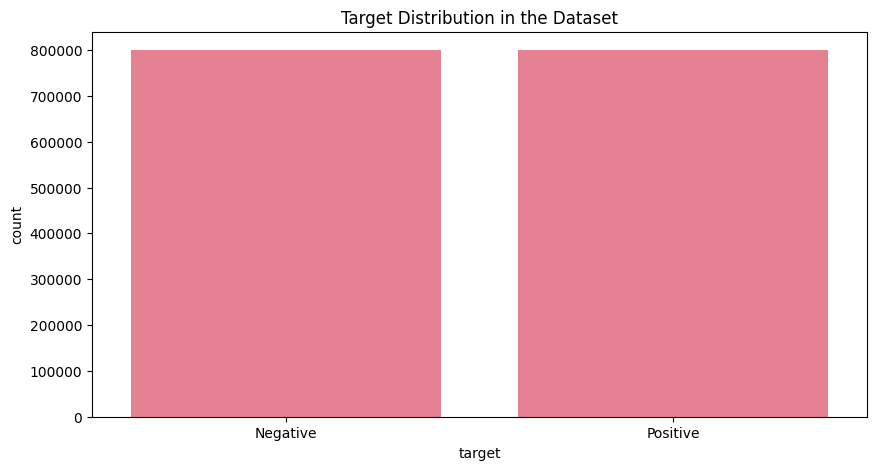

In [40]:
#  visulization the distrubtion of dataset target
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="target")
plt.title("Target Distribution in the Dataset")
x = ["Negative", "Positive"]
plt.xticks([0, 1], x)
plt.savefig(RESULTS_DIR + "target_distribution.png")
plt.show()

#### Analyse the Tweet Length


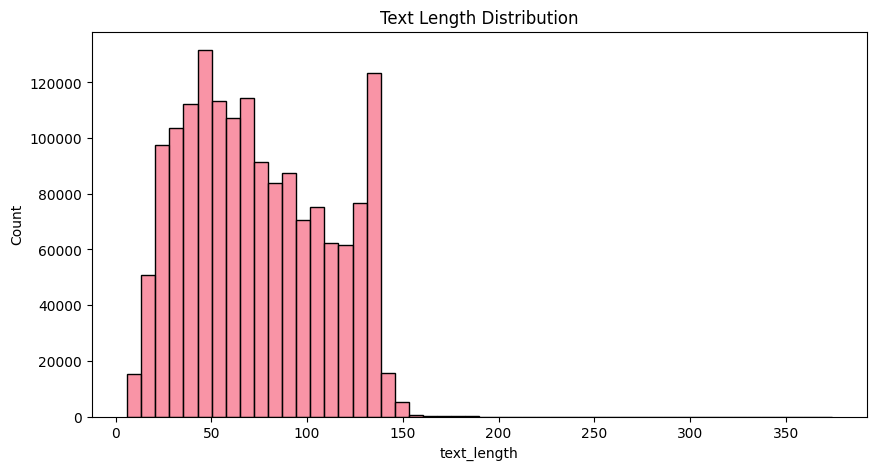

In [24]:
# visuaize the distribution of the text length
plt.figure(figsize=(10, 5))
sns.histplot(df["text_length"], bins=50)
plt.title("Text Length Distribution")
plt.savefig(RESULTS_DIR + "text_length_distribution.png")
plt.show()

#### Visualize the tweet distrubtion by months


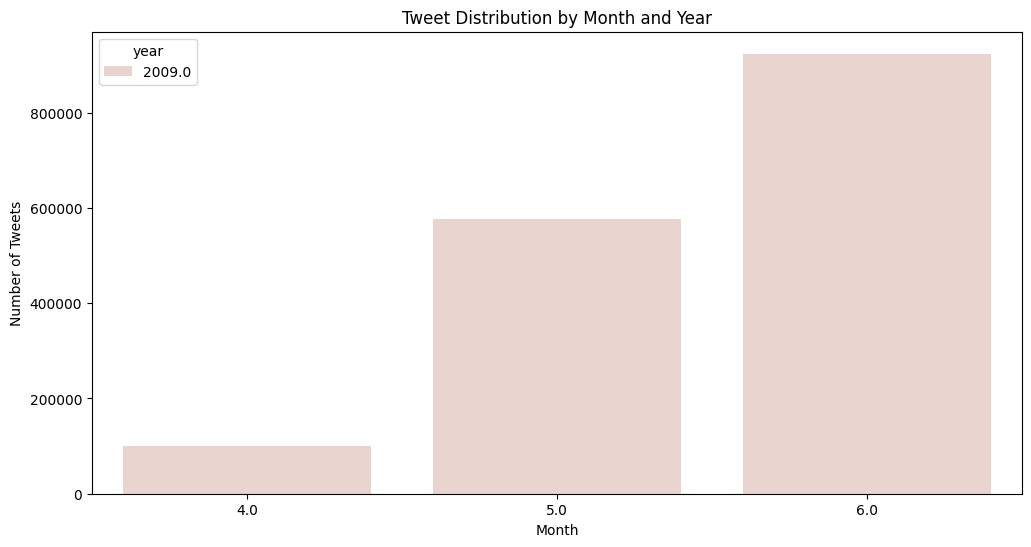

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df.groupby(["year", "month"]).size().reset_index(name="count"),
    x="month",
    y="count",
    hue="year",
)
plt.title("Tweet Distribution by Month and Year")
plt.xlabel("Month")
plt.ylabel("Number of Tweets")
plt.savefig(RESULTS_DIR + "tweet_month_year_distribution.png")
plt.show()

#### Visualize the Sentiment DIstrubtion by Month


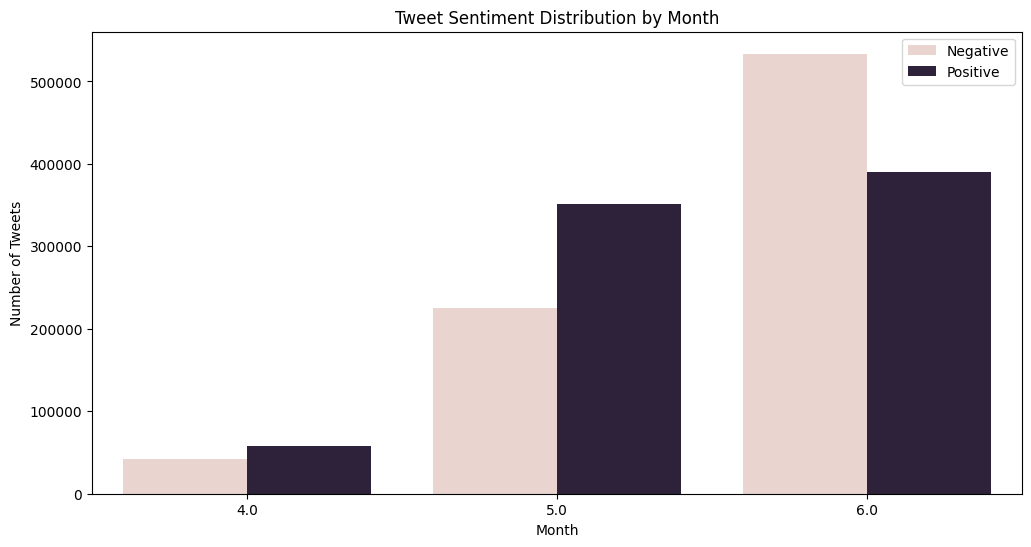

In [35]:
# visualize thetype of the tweet for by month and year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="month", hue="target")
plt.title("Tweet Sentiment Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Number of Tweets")
plt.legend(["Negative", "Positive"])
plt.savefig(RESULTS_DIR + "tweet_sentiment_month_distribution.png")
plt.show()

#### Visualize THe tweet distrubtion by year


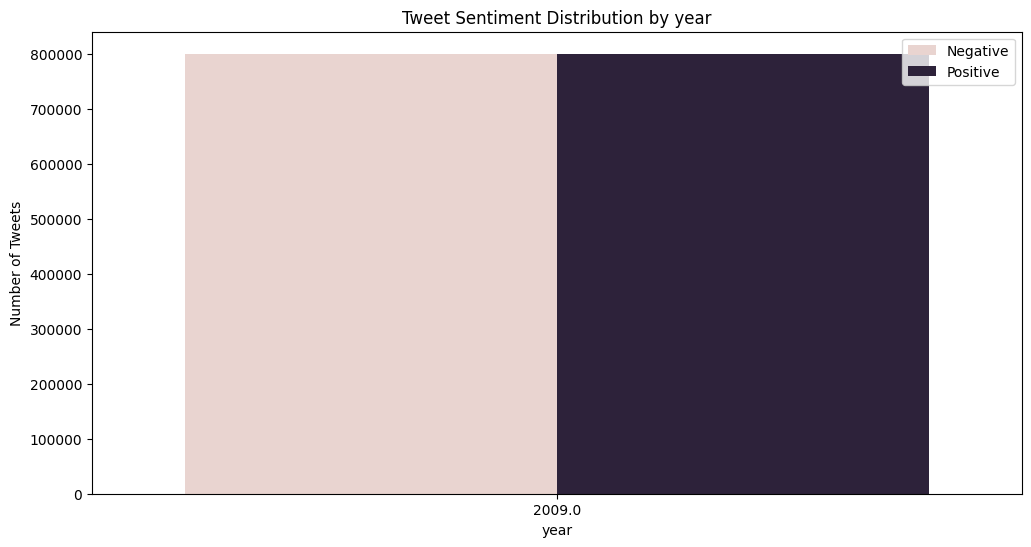

In [36]:
# visualize thetype of the tweet for by  year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="year", hue="target")
plt.title("Tweet Sentiment Distribution by year")
plt.xlabel("year")
plt.ylabel("Number of Tweets")
plt.legend(["Negative", "Positive"])
plt.savefig(RESULTS_DIR + "tweet_sentiment_year_distribution.png")
plt.show()

/home/oussama/general-venv/lib/python3.12/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/oussama/general-venv/lib/python3.12/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/oussama/general-venv/lib/python3.12/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


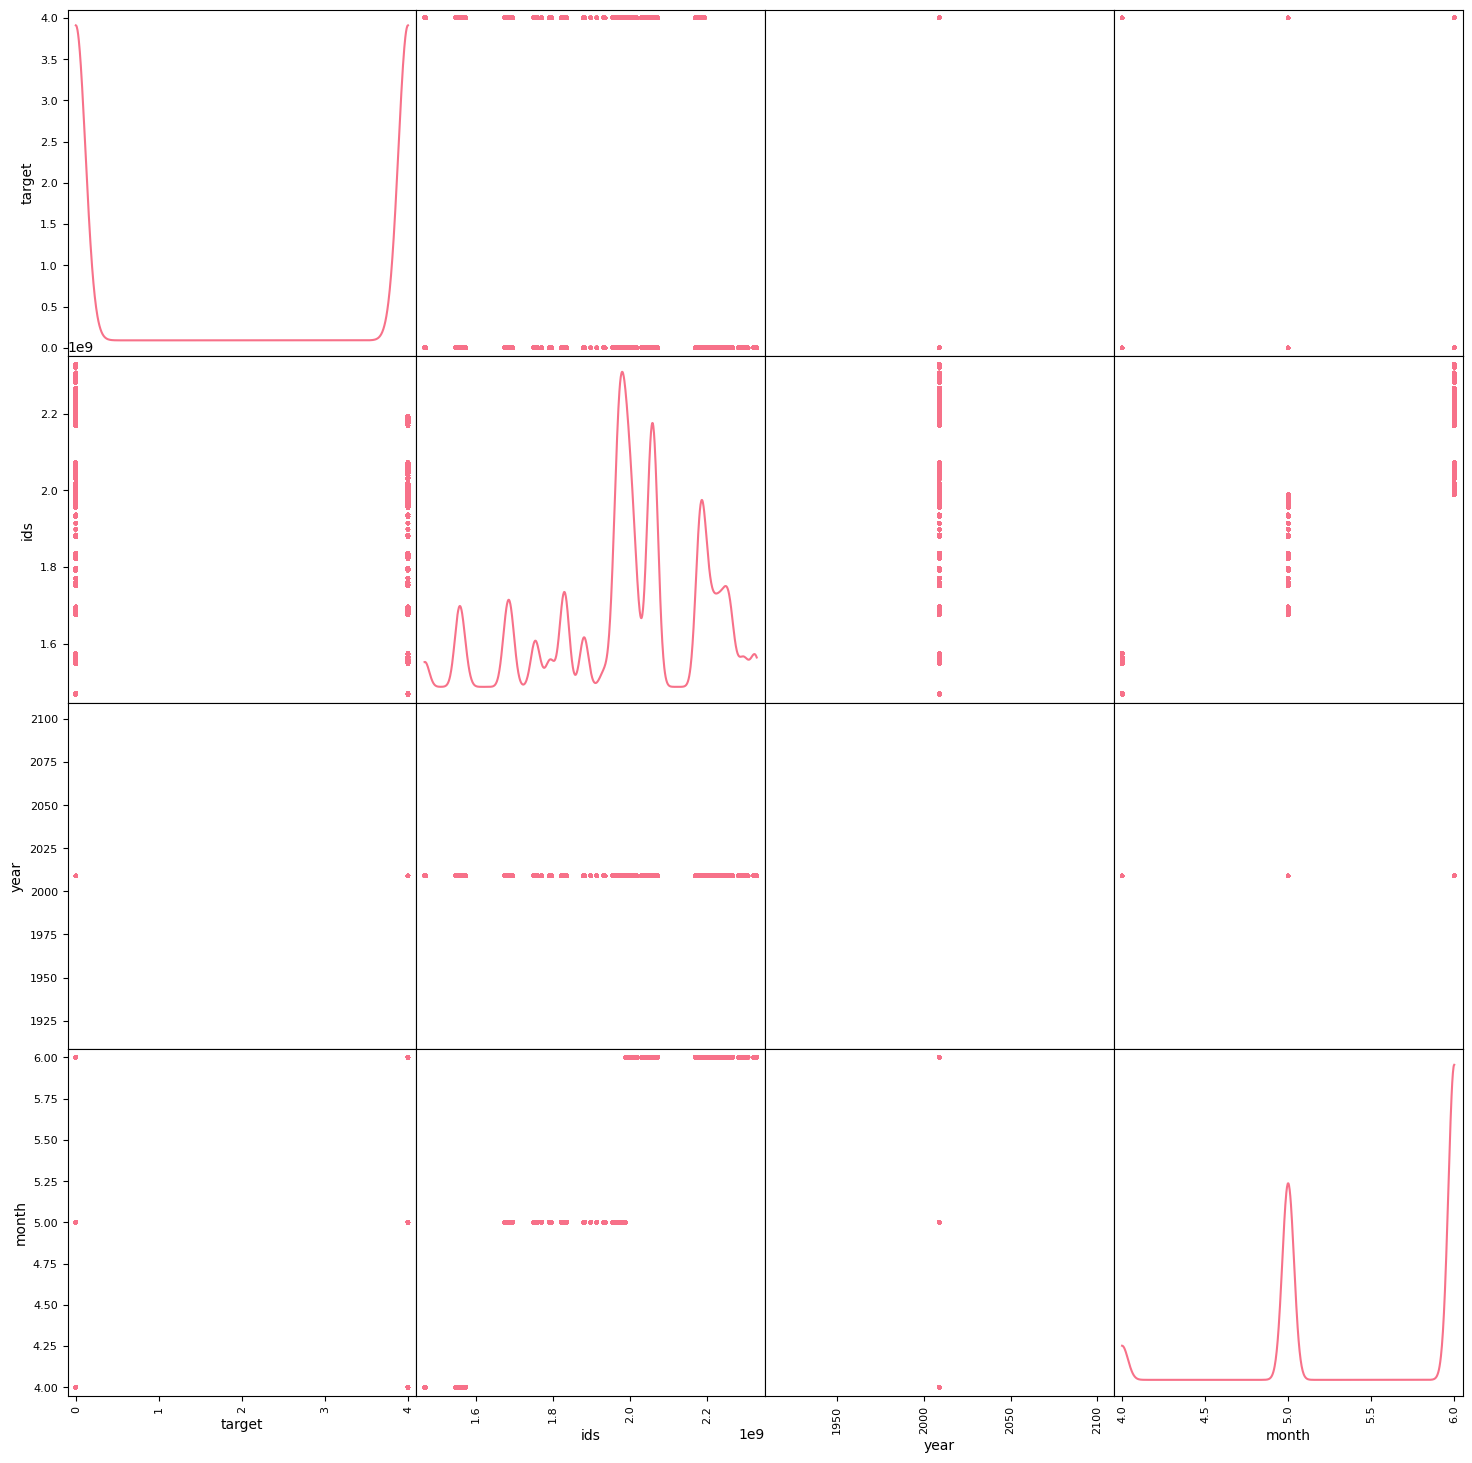

In [15]:
from pandas.plotting import scatter_matrix

# check the distribution of the dataset using scatter matrix
scatter_matrix(df, alpha=0.2, figsize=(18, 18), diagonal="kde")
plt.savefig(RESULTS_DIR + "scatter_matrix.png")
plt.show()

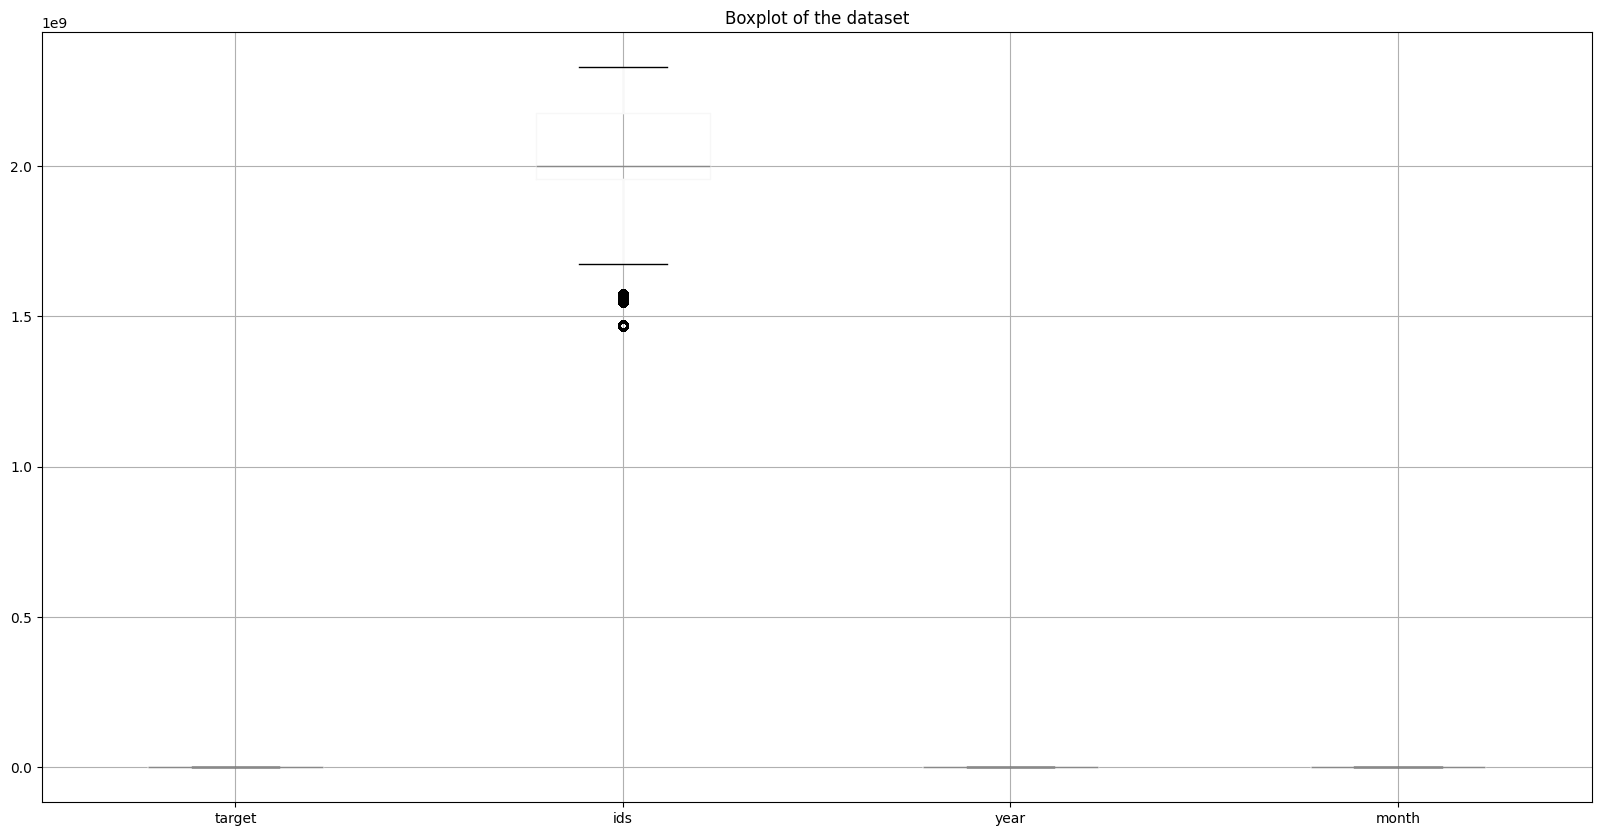

In [13]:
df.boxplot(figsize=(20, 10))
plt.title("Boxplot of the dataset")
plt.savefig(RESULTS_DIR + "boxplot.png")
plt.show()

## 4- Preprocessing


In [3]:
# converting the target into [0, 1] for the model
df["target"] = df["target"].map({0: 0, 4: 1})

In [4]:
df["target"].unique()

array([0, 1])

In [5]:
import nltk

nltk.download("averaged_perceptron_tagger_eng")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt_tab")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/oussama/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/oussama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/oussama/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/oussama/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
import re
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize


# the cleaning function for preprocessing the text
def clean_text(tweet: str) -> list[str]:
    """
    this function will remove the special characters and the links from the text
    and clean the tweet text and prepare it for next setp

    Args:
        tweet: str : the tweet text
    return:
        str : cleaned tweet text

    """
    # remove special characters
    tweet = re.sub(r"[^a-zA-Z0-9]", " ", tweet)
    # remove links
    tweet = re.sub(r"http\S+", "", tweet)
    # remove multiple spaces
    tweet = re.sub(r"\s+", " ", tweet)

    #  remove non-ascii characters
    tweet = tweet.encode("ascii", "ignore").decode("ascii")

    stop_words = set(stopwords.words("english"))

    tokenized_tweet = word_tokenize(tweet)

    # remove stopwords

    tokenized_tweet = [
        word for word in tokenized_tweet if word.lower() not in stop_words
    ]

    return tokenized_tweet

In [7]:
from nltk.stem import PorterStemmer


def stemming_text(tokenized_tweet: list[str]) -> list[str]:
    """
    this function will stem the tweet text

    Args:
        tokenized_tweet: list[str] : the tweet text tokinized
    return:
        str : stemmed tweet text

    """
    stemmer = PorterStemmer()
    return " ".join([stemmer.stem(word) for word in tokenized_tweet])

In [8]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV,
    }
    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize_text(tokenized_tweet: list[str]) -> list[str]:
    """
    this function will lemmatize the tweet text

    Args:
        tokenized_tweet: list[str] : the tweet text tokinized
    return:
        str : lemmatized tweet text

    """
    lemmatizer = WordNetLemmatizer()
    return " ".join(
        [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokenized_tweet]
    )

In [9]:
# select the text and target columns
# df = df[["text", "target"]]
# take a sample of 100 rows
# df = df.sample(n=100, random_state=42)
df["clean_tweet"] = df["text"].apply(clean_text)
df["lemmatized_tweet"] = df["clean_tweet"].apply(lemmatize_text)
df["stemmed_tweet"] = df["clean_tweet"].apply(stemming_text)
df["clean_tweet"] = df["clean_tweet"].apply(lambda x: " ".join([y for y in x]))
df.to_csv(RESULTS_DIR + "cleaned_tweets.csv", index=False)
df.head()

,target,ids,date,flag,user,text,clean_tweet,lemmatized_tweet,stemmed_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com 2y1zl Awww bummer ...,switchfoot http twitpic com 2y1zl Awww bummer ...,switchfoot http twitpic com 2y1zl awww bummer ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update Facebook texting might cry result...,upset update Facebook texting might cry result...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Kenichan dived many times ball Managed save 50...,Kenichan dive many time ball Managed save 50 r...,kenichan dive mani time ball manag save 50 res...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole body feel itchy like fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see,nationwideclass behaving mad see,nationwideclass behav mad see


## 5- Sentiments Analyses


In [15]:
import pandas as pd

df = pd.read_csv(DATA_DIR + "cleaned_tweets.csv")

tweets_columns = [
    "clean_tweet",
    "lemmatized_tweet",
    "stemmed_tweet",
]

In [16]:
#  test cuda availability
import torch

os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
print(torch.cuda.is_available())
# Check if CUDA is available and set device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

True
Using device: cuda


In [17]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)

### Train LLM model using pytorch


In [18]:
from transformers import AutoTokenizer


tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [19]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [20]:
from datasets import Dataset


def prepare_dataset(df: pd.DataFrame, column_selected) -> Dataset:
    """
    this function will prepare the dataset for the model

    Args:
        df: pd.DataFrame : the cleaned dataframe
    return:
        Dataset : the dataset for the model

    """

    train = df[[column_selected, "target"]].sample(frac=0.8, random_state=1542)
    test = df[[column_selected, "target"]].drop(train.index)
    print(train.head())
    # Convert pandas DataFrames to Hugging Face datasets
    train_dataset = Dataset.from_pandas(train.reset_index(drop=True))
    eval_dataset = Dataset.from_pandas(test.reset_index(drop=True))

    # Rename columns to fit model requirements
    train_dataset = train_dataset.rename_column(column_selected, "text")
    train_dataset = train_dataset.rename_column("target", "labels")
    eval_dataset = eval_dataset.rename_column(column_selected, "text")
    eval_dataset = eval_dataset.rename_column("target", "labels")
    print(train_dataset[0])
    print(eval_dataset[0])
    return train_dataset, eval_dataset


def preprocess_function(dataset):
    """this function will tokenize the dataset"""
    texts = [str(t) for t in dataset["text"]]
    return tokenizer(texts, truncation=True)

#### Model Setup


In [6]:
from huggingface_hub import notebook_login

notebook_login()

In [21]:
import numpy as np
import torch


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    recall = recall_score(labels, predictions)
    precision = precision_score(labels, predictions)
    return {
        "accuracy": accuracy,
        "f1": f1,
        "recall": recall,
        "precision": precision,
    }

#### Train the model


/home/oussama/general-venv/lib/python3.12/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


                                          lemmatized_tweet  target
1306451  start edit pic take dear friend donna today th...       1
1371003  NiceBallz send invite orlandogolfblog practice...       1
1322989                            SUAREASY want year book       1
811094                                          Shower BRB       1
1341449                       mikedignammusic yes thx youu       1
{'text': 'start edit pic take dear friend donna today think cutest baldie ever', 'labels': 1}
{'text': 'switchfoot http twitpic com 2y1zl Awww bummer shoulda get David Carr Third Day', 'labels': 0}


Map:   0%|          | 0/1280000 [00:00<?, ? examples/s]

Map:   0%|          | 0/320000 [00:00<?, ? examples/s]

Using device: cuda
Training model on lemmatized_tweet column


/tmp/ipykernel_9814/3999801370.py:51: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Recall,Precision
1,0.422600,0.415302,0.806753,0.809779,0.822144,0.797782
2,0.383200,0.411769,0.810919,0.808251,0.796503,0.820350
3,0.352200,0.425180,0.809866,0.812651,0.824211,0.801410
4,0.317500,0.445890,0.807678,0.807362,0.805529,0.809204


Training completed for lemmatized_tweet column


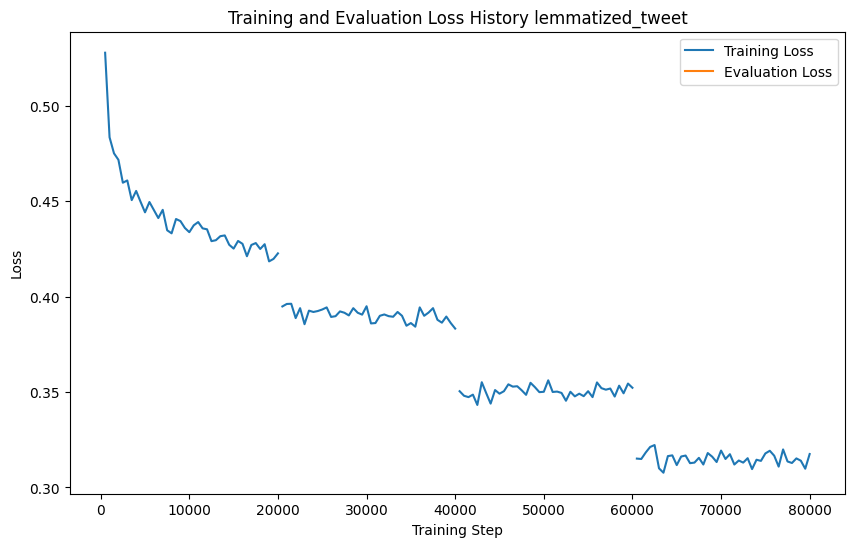

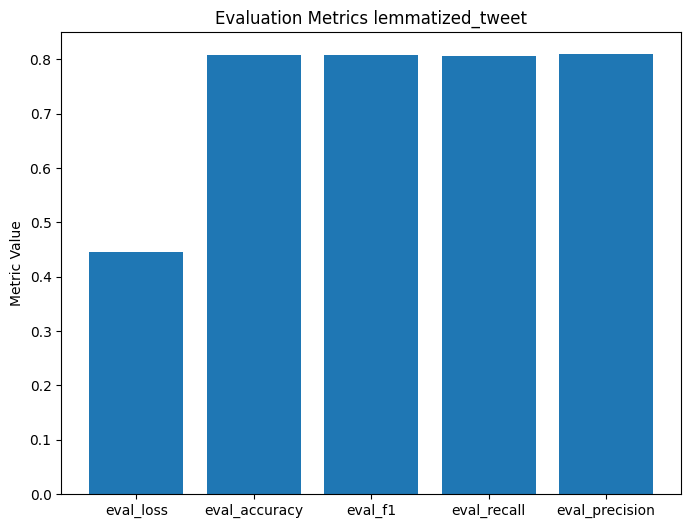

Model and tokenizer saved to tweet_sentiment_analysis_lemmatized_tweet


/home/oussama/general-venv/lib/python3.12/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


                                             stemmed_tweet  target
1306451  start edit pic took dear friend donna today th...       1
1371003  niceballz send invit orlandogolfblog practic t...       1
1322989                            suareasi want year book       1
811094                                          shower brb       1
1341449                          mikedignammus ye thx youu       1
{'text': 'start edit pic took dear friend donna today think cutest baldi ever', 'labels': 1}
{'text': 'switchfoot http twitpic com 2y1zl awww bummer shoulda got david carr third day', 'labels': 0}


Map:   0%|          | 0/1280000 [00:00<?, ? examples/s]

Map:   0%|          | 0/320000 [00:00<?, ? examples/s]

Using device: cuda
Training model on stemmed_tweet column


/tmp/ipykernel_9814/3999801370.py:51: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Recall,Precision
1,0.431700,0.423193,0.802228,0.806221,0.822312,0.790747
2,0.394000,0.417424,0.807775,0.807762,0.807197,0.808328
3,0.362000,0.428125,0.806600,0.809363,0.820576,0.798453
4,0.330900,0.445215,0.804909,0.804013,0.799833,0.808238


Training completed for stemmed_tweet column


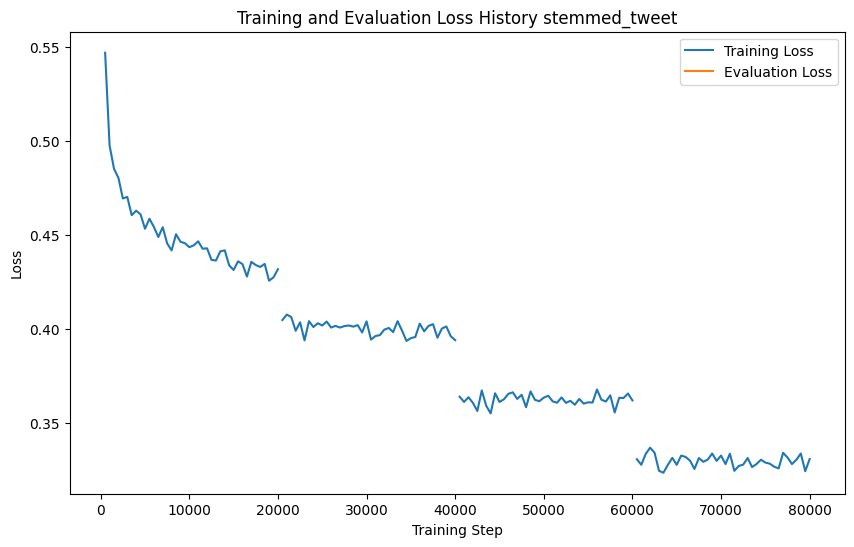

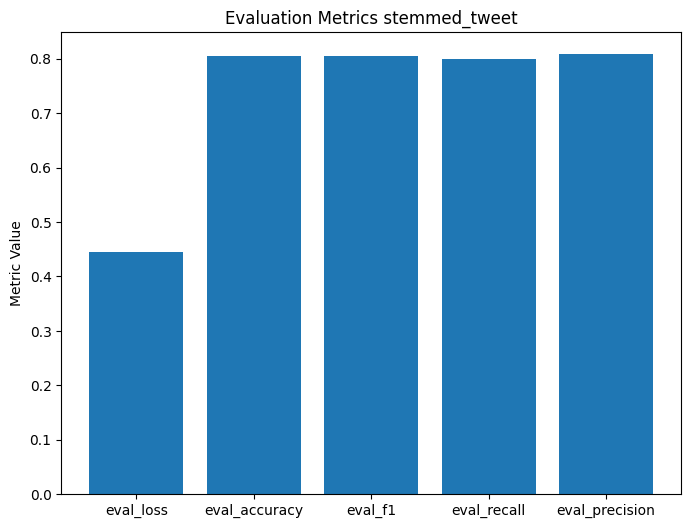

Model and tokenizer saved to tweet_sentiment_analysis_stemmed_tweet


In [11]:
# Set CUDA_LAUNCH_BLOCKING for debugging
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

models = {
    column: AutoModelForSequenceClassification.from_pretrained(
        "distilbert-base-uncased", num_labels=2
    )
    for column in tweets_columns
}
for column in tweets_columns:
    # set name for the repo
    repo_name = f"tweet_sentiment_analysis_{column}"

    # Set up training arguments
    training_args = TrainingArguments(
        output_dir=repo_name,  # output directory
        learning_rate=2e-5,
        per_device_train_batch_size=64,  # reduced batch size
        per_device_eval_batch_size=64,  # reduced batch size
        num_train_epochs=4,
        weight_decay=0.01,
        save_strategy="epoch",
        evaluation_strategy="epoch",
        # push_to_hub=True,
        logging_dir=f"./logs/{repo_name}",
        fp16=True,  # enable mixed precision on CUDA
        dataloader_num_workers=2,
        dataloader_pin_memory=True,
    )

    #  loading dataset
    train_dataset, eval_dataset = prepare_dataset(df, column)
    tokenized_train = train_dataset.map(preprocess_function, batched=True)
    tokenized_test = eval_dataset.map(preprocess_function, batched=True)

    # Load model and move it to the appropriate device
    model = models[column]

    model = model.to(device)

    # Check if labels are within the expected range
    num_labels = model.config.num_labels
    for dataset in [tokenized_train, tokenized_test]:
        labels = dataset["labels"]
        if not all(0 <= label < num_labels for label in labels):
            raise ValueError(f"Found labels outside the range [0, {num_labels - 1}]")

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train,
        eval_dataset=tokenized_test,
        tokenizer=tokenizer,
        data_collator=data_collator,
        compute_metrics=compute_metrics,
    )

    # Start training with error handling
    try:
        print(f"Training model on {column} column")
        trainer.train()
        print(f"Training completed for {column} column")
    except RuntimeError as e:
        print(f"Error during training: {e}")
        print("Try reducing batch size or using CPU if CUDA memory is insufficient")

    # Convert trainer's log_history to a DataFrame for easier plotting
    history = pd.DataFrame(trainer.state.log_history)

    # Plot training (and evaluation) loss if available
    plt.figure(figsize=(10, 6))
    if "loss" in history.columns:
        plt.plot(history["step"], history["loss"], label="Training Loss")
    if "eval_loss" in history.columns:
        plt.plot(history["step"], history["eval_loss"], label="Evaluation Loss")
    plt.xlabel("Training Step")
    plt.ylabel("Loss")
    plt.title(f"Training and Evaluation Loss History {column}")
    plt.legend()
    plt.savefig(RESULTS_DIR + f"{column}_training_eval_loss_history.png")
    plt.show()

    eval_results = trainer.evaluate()

    # Remove non-metric keys if present
    metric_keys = [
        k
        for k in eval_results.keys()
        if k
        in [
            "eval_loss",
            "eval_accuracy",
            "eval_f1",
            "eval_precision",
            "eval_recall",
        ]
    ]

    # Save the evaluation metrics into a DataFrame and export as CSV
    metrics_df = pd.DataFrame([{k: eval_results[k] for k in metric_keys}])
    metrics_df.to_csv(RESULTS_DIR + f"{column}_evaluation_metrics.csv", index=False)

    # Plot evaluation metrics as a bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(metric_keys, [eval_results[k] for k in metric_keys])
    plt.ylabel("Metric Value")
    plt.title(f"Evaluation Metrics {column}")
    plt.savefig(RESULTS_DIR + f"{column}_evaluation_metrics.png")
    plt.show()

    # saving the models
    trainer.save_model(repo_name)
    tokenizer.save_pretrained(repo_name)
    print(f"Model and tokenizer saved to {repo_name}")

In [29]:
trainer.push_to_hub()

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/5.30k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/M-Oussama/tweet_sentiment_analysis/commit/57738b697cff44a6339411944b984fa348ee7f8b', commit_message='End of training', commit_description='', oid='57738b697cff44a6339411944b984fa348ee7f8b', pr_url=None, repo_url=RepoUrl('https://huggingface.co/M-Oussama/tweet_sentiment_analysis', endpoint='https://huggingface.co', repo_type='model', repo_id='M-Oussama/tweet_sentiment_analysis'), pr_revision=None, pr_num=None)

### Using Statistical methode


In [22]:
%pip install -q textblob
from textblob import TextBlob


# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


# Create a function to get Polarity
def getPolarity(text):
    polarity = TextBlob(text).sentiment.polarity
    # shift the polarity score to fit the target range of 0 and 1
    return 1 if polarity > 0 else 0


def getInsight(score):
    if score == 0:
        return "Negative"
    elif score == 1:
        return "Positive"
    else:
        return "Neutral"


def analyze_sentement(df, target: str = "text"):
    # Now we create a new column for what we just did and add it to the Tweet_df dataframe
    print(f"Analyzing {target} using textblob sentiment analysis")
    df.dropna(subset=[target], inplace=True)
    df[f"{target}_Subjectivity"] = df[target].apply(getSubjectivity)
    df[f"{target}_Polarity"] = df[target].apply(getPolarity)
    # Now display data

    # Group the range of Polarity into different categories

    df[f"{target}_Insight"] = df[f"{target}_Polarity"].apply(getInsight)

    return df


Note: you may need to restart the kernel to use updated packages.


### Using preTrained LLM Model


In [23]:
# use 25% from the dataset as testing because the huge size of the dataset
# df = pd.read_csv(DATA_DIR + "models_evaluations_results.csv")
df = df.sample(frac=0.20, random_state=42)
df.drop(labels=["date", "flag", "user", "text"], axis=1, inplace=True)
print(df.shape)
df.head()

(320000, 5)


,target,ids,clean_tweet,lemmatized_tweet,stemmed_tweet
541200,0,2200003196,chrishasboobs AHHH HOPE OK,chrishasboobs AHHH HOPE OK,chrishasboob ahhh hope ok
750,0,1467998485,misstoriblack cool tweet apps razr 2,misstoriblack cool tweet apps razr 2,misstoriblack cool tweet app razr 2
766711,0,2300048954,TiannaChaos know family drama lame hey next ti...,TiannaChaos know family drama lame hey next ti...,tiannachao know famili drama lame hey next tim...
285055,0,1993474027,School email open geography stuff revise Stupi...,School email open geography stuff revise Stupi...,school email open geographi stuff revis stupid...
705995,0,2256550904,upper airways problem,upper airway problem,upper airway problem


Device set to use cuda:0


starting prediction of clean_tweet using pretrained model


Device set to use cuda:0


starting prediction of clean_tweet using finetuned model
Analyzing clean_tweet using textblob sentiment analysis
Results for clean_tweet column using pre-trained model:
accuracy: 0.65833125
f1: 0.6107780594081964
precision: 0.7125118357447798
recall: 0.5344660012709805
Results for clean_tweet column using fine-tuned model:
accuracy: 0.50158125
f1: 0.6680707420927106
precision: 0.50158125
recall: 1.0
Results for clean_tweet column using statistical model:
accuracy: 0.6214291742597345
f1: 0.5952274322382274
precision: 0.6418269750545974
recall: 0.5549365290059638


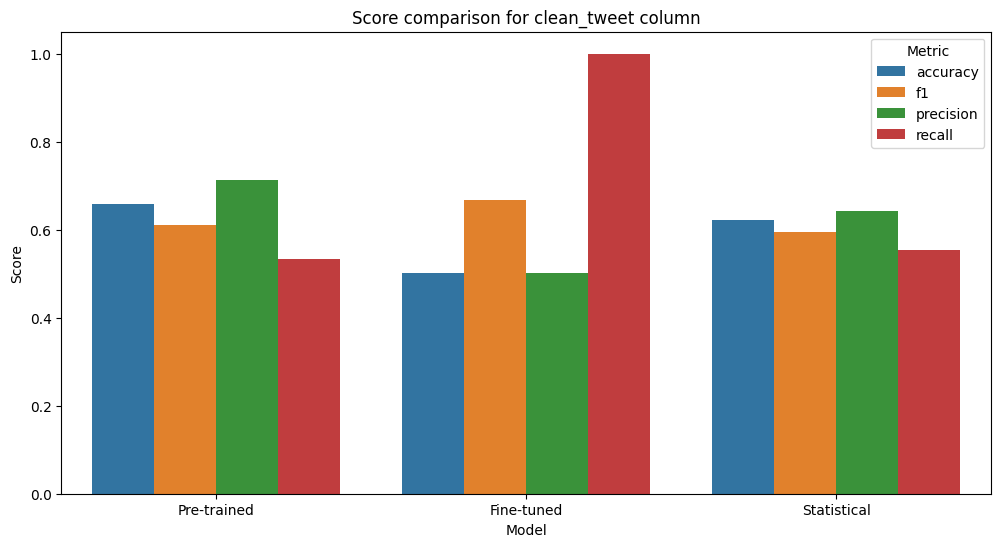

Device set to use cuda:0


starting prediction of lemmatized_tweet using pretrained model


Device set to use cuda:0


starting prediction of lemmatized_tweet using finetuned model
Analyzing lemmatized_tweet using textblob sentiment analysis
Results for lemmatized_tweet column using pre-trained model:
accuracy: 0.6519118901972062
f1: 0.6056182401563928
precision: 0.7014249501636601
recall: 0.5328385275477201
Results for lemmatized_tweet column using fine-tuned model:
accuracy: 0.5015863390420701
f1: 0.6680752561481809
precision: 0.5015863390420701
recall: 1.0
Results for lemmatized_tweet column using statistical model:
accuracy: 0.6170780728871996
f1: 0.5878061911170929
precision: 0.6388216451039618
recall: 0.544336218661781


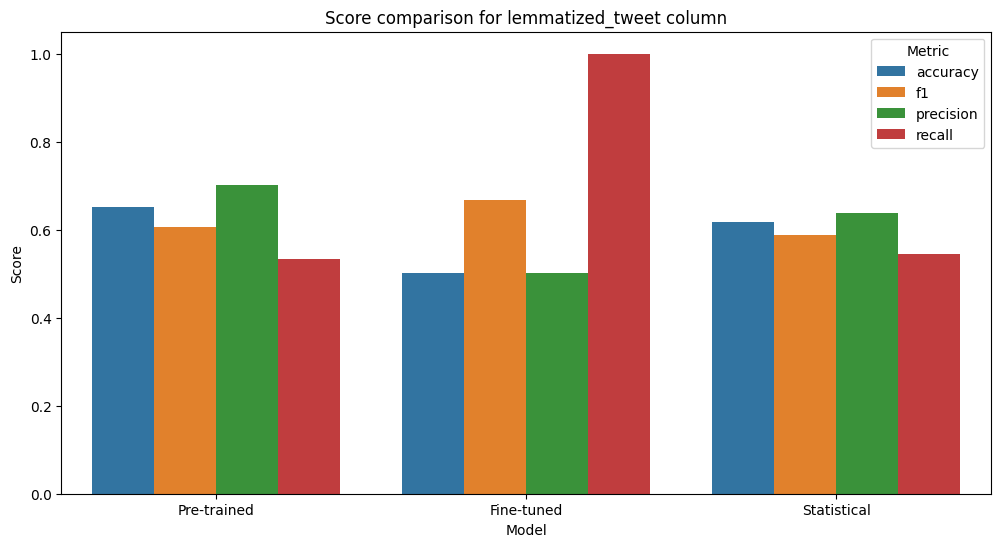

Device set to use cuda:0


starting prediction of stemmed_tweet using pretrained model


Device set to use cuda:0


starting prediction of stemmed_tweet using finetuned model
Analyzing stemmed_tweet using textblob sentiment analysis
Results for stemmed_tweet column using pre-trained model:
accuracy: 0.6155620641474874
f1: 0.5334097142922178
precision: 0.6817132772196579
recall: 0.43810253821658035
Results for stemmed_tweet column using fine-tuned model:
accuracy: 0.5015863390420701
f1: 0.6680752561481809
precision: 0.5015863390420701
recall: 1.0
Results for stemmed_tweet column using statistical model:
accuracy: 0.5928656941288264
f1: 0.5302107829700057
precision: 0.629370210215353
recall: 0.45804433310275633


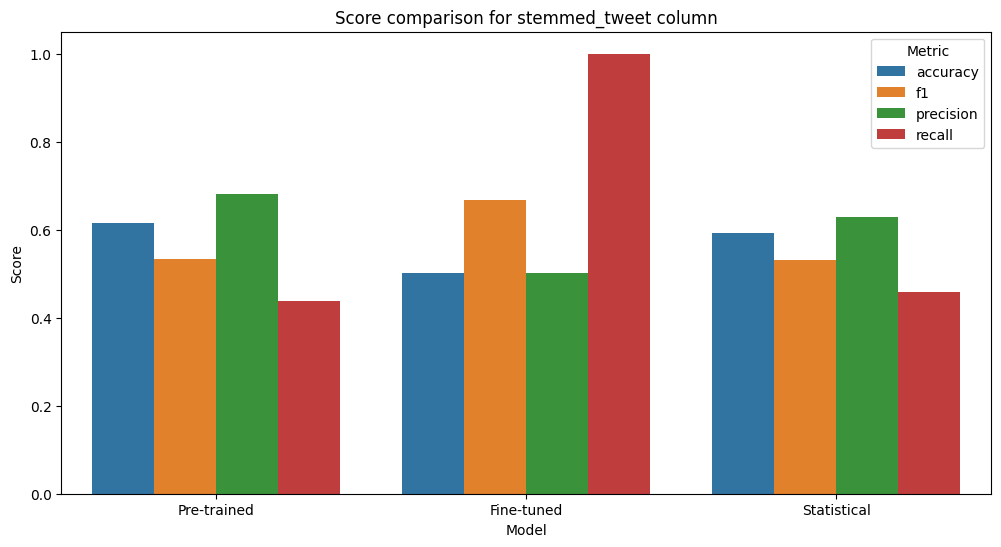

In [24]:
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns


for column in tweets_columns:
    repo_name = f"tweet_sentiment_analysis_{column}"
    sentiment_pipeline = pipeline(
        "sentiment-analysis",
        model="distilbert/distilbert-base-uncased-finetuned-sst-2-english",
    )
    # print(df[column].tolist()[0])
    print(f"starting prediction of {column} using pretrained model")
    results = sentiment_pipeline(df[column].apply(str).tolist())
    parsed_results = [0 if result["label"] == "NEGATIVE" else 1 for result in results]

    df[f"{column}_finetuned_sentiment"] = [result["label"] for result in results]
    df[f"{column}_pretrained_score"] = [result["score"] for result in results]
    evaluation = {
        "accuracy": accuracy_score(df["target"], parsed_results),
        "f1": f1_score(df["target"], parsed_results),
        "precision": precision_score(df["target"], parsed_results),
        "recall": recall_score(df["target"], parsed_results),
    }

    sentiment_pipeline = pipeline(
        "sentiment-analysis",
        model=f"./{repo_name}/",
    )
    print(f"starting prediction of {column} using finetuned model")

    results = sentiment_pipeline(df[column].apply(str).tolist())
    parsed_results = [0 if result["label"] == "NEGATIVE" else 1 for result in results]
    df[f"{column}_finetuned_sentiment"] = [result["label"] for result in results]
    df[f"{column}_finetuned_score"] = [result["score"] for result in results]
    local_model_evaluation = {
        "accuracy": accuracy_score(df["target"], parsed_results),
        "f1": f1_score(df["target"], parsed_results),
        "precision": precision_score(df["target"], parsed_results),
        "recall": recall_score(df["target"], parsed_results),
    }
    df = analyze_sentement(df, column)
    statistical_model_evaluation = {
        "accuracy": accuracy_score(df["target"], df[f"{column}_Polarity"]),
        "f1": f1_score(df["target"], df[f"{column}_Polarity"]),
        "precision": precision_score(df["target"], df[f"{column}_Polarity"]),
        "recall": recall_score(df["target"], df[f"{column}_Polarity"]),
    }
    print(f"Results for {column} column using pre-trained model:")
    for key, value in evaluation.items():
        print(f"{key}: {value}")
    print(f"Results for {column} column using fine-tuned model:")
    for key, value in local_model_evaluation.items():
        print(f"{key}: {value}")
    print(f"Results for {column} column using statistical model:")
    for key, value in statistical_model_evaluation.items():
        print(f"{key}: {value}")
    #  create dataframe for all the results and save it
    evaluation_df = pd.DataFrame(
        [
            {"Model": "Pre-trained", **evaluation},
            {"Model": "Fine-tuned", **local_model_evaluation},
            {"Model": "Statistical", **statistical_model_evaluation},
        ]
    )
    evaluation_df.to_csv(RESULTS_DIR + f"{column}_results.csv", index=False)
    # plot the results df
    evaluation_df_melt = evaluation_df.melt(
        id_vars="Model",
        value_vars=["accuracy", "f1", "precision", "recall"],
        var_name="Metric",
        value_name="Score",
    )
    plt.figure(figsize=(12, 6))
    sns.barplot(data=evaluation_df_melt, x="Model", y="Score", hue="Metric")
    plt.title(f"Score comparison for {column} column")
    plt.xlabel("Model")
    plt.ylabel("Score")
    plt.savefig(RESULTS_DIR + f"{column}_accuracy_comparison.png")
    plt.show()


df.to_csv(DATA_DIR + "models_evaluations_results.csv", index=False)